<a href="https://colab.research.google.com/github/JPeebles-DataScientist/Project1_Core/blob/main/Project1_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import Pandas, Matplotlib, Seaborn, Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
#How many rows and columns?
rows = df.shape[0]
cols = df.shape[1]

print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 8523
Columns: 12


In [19]:
#What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [20]:
#Are there duplicates?
duplicateRows = df[df.duplicated()]

In [21]:
# If so, drop any duplicates.
df.drop_duplicates(keep=False,inplace=True)


In [22]:
#Identify missing values.  Used https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345 to identify
df.loc[:, df.isnull().any()].columns


Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [23]:
#Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df.loc[:,'Outlet_Size'].fillna('Unknown', inplace=True)
df.loc[:,'Item_Weight'].fillna(0, inplace=True)


#Used Unknown as we would need more information from business analyst or SME

In [24]:
#Confirm that there are no missing values after addressing them.
df.loc[:, df.isnull().any()].columns



Index([], dtype='object')

In [25]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
#Rename LF/low fat columns to Low Fat and reg to Regular
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat'},inplace=True)
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


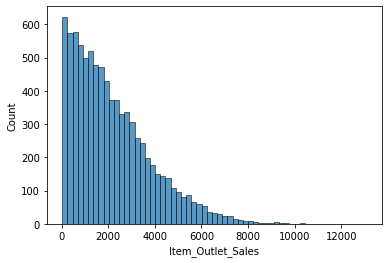

In [30]:
#Histogram to view the distributions of various features in your dataset.

sns.histplot(data = df
            ,x = 'Item_Outlet_Sales'
            )

The data is skewed to the left indicating there are more sales at the lower end of the range.

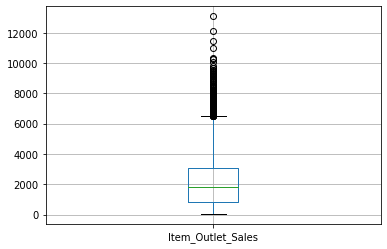

In [38]:
#Boxplot to view statistical summaries of various features in your dataset.

df.boxplot(column=[ 'Item_Outlet_Sales'])  


We might want to investigate as to why there are so many outliers in Outlet Sales. Is it based on seasonality? Was there a sale?

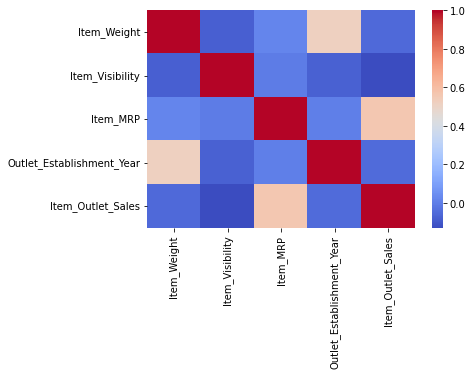

In [41]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')


outlet sales  and the MRP has a positive correlation though it is not strong. I anticipated that sales would be tied more to MRP than indicated by the data.